# 统计思维课程
## 简介
本课程是建立在利用Python实现概率论与数理统计的基础上的一门关于数据分析的基础课程，利用Python语言将统计学的主要脉络进行了概览性的分析与讨论。
## 课程的主要内容与安排
* 统计思维的简介
* 描述性统计
* 累积分布
* 连续分布
* 指数分布
* 概率
* 分布的运算
* 假设检验
* 估计
* 相关性
* 推荐阅读

## 统计思维简介
本课程中，将主要介绍三门相互关联的学科，即概率论，统计学，计算。从而获得概率论与统计学的知识与思维方式。以计算为实现手段剖析概率论与数理统计的数学思维。

### 当下热点：二胎问题
和生孩子最有关系的是生孩子的时间，比如妊娠期超过了某一段时间就会晚产，太少则是早产。

关于这类问题其实已经有了很多的经验之谈，你去医院的产房就能听到很多，但是经验之谈有很多实际的问题，让经验之谈的价值几乎为零：

* 观察数量太少，个人的经验之谈往往并没有怎样的借鉴作用，如果是医生或者产科护士则另当别论。
* 选择偏差，一般来说第一胎比较晚的父母才会有兴趣加入这样的讨论，正常人谁管你。
* 确认偏差，支持实例和反例其实都不少
* 不精确，传闻、个人经历在记忆和复述中会造成极大地麻烦。

### 统计方法——你可以信任的伙伴
对于上述几类问题的描述，我们可以运用统计学的手段来进行解决：

* 数据收集
* 描述性统计
* 探索性数据分析（值得一提，虽然统计学这门学科从伦敦大瘟疫时代就开始萌芽，但是探索性数据分析则是1980年左右才开始的一项新的探索。瞧！我在这里的左右又让你们的数据价值降低了不少）
* 假设检验
* 估计

## 描述性统计量
### 均值和平均值
假设一个包含n个值的样本Xi,他们的均值u就等于他们的值的总和除以值的数量，这是非常显而易见的事情，如公式：

$$\mu =\frac{1}{n}\sum x_{i}$$

值得注意的是，在很多情况下均值(mean)和平均值(average)在很多情况下是相同的，但是在本质上依然是有区别的：

* 样本的“均值”是根据公式计算出来的一个汇总统计量
* 而“平均值”是若干种可以描述样本的典型值或者集中趋势的汇总统计量之一

** 注意： 均值的使用 **

In [2]:
import numpy as np
apples = [1,2,1,3,1,2,3,1]
mean_apples = np.mean(apples)
print mean_apples

1.75


In [4]:
duch = [10,10,300]
mean_duch = np.mean(duch)
print mean_duch

106.666666667


### 方差
上面的例子，很明显的说明了南瓜的平均值并不能很好的概括一个数组的情况，为了让问题能够解决，我们引入了方差。他既是平均值的助手也是均值的对立。

* 方差能够很好的涵盖上述南瓜的问题
* 方差描述分散情况而非集中趋势，这正好与均值的集中趋势相反

$$\sigma ^{2}=\frac{1}{n}\sum (x_{i}- \mu )^{2}$$

$$x_{i}- \mu$$ 

这一部分是离均差，即方差是偏差的方均值。取方差的算术根就是标准差。

相对于方差而言标准差的优势在于标准差的量纲是和统计量一致的。

In [5]:
var_apples = np.var(apples)
var_duch = np.var(duch)
print var_apples, var_duch

0.6875 18688.8888889


### 样本方差概览
已经接触过概率论与数理统计或者统计学的人应该已经知道了样本方差这一概念，样本方差的具体概念将在后续继续谈论，这和无偏性有关，在此仅仅先给出一个公式：

$$\sigma ^{2}=\frac{1}{n-1}\sum (x_{i}- \mu )^{2}$$

### 分布
对于数据而言，汇总统计量虽然简单明了，但是往往会带来很多的问题，也不能很细致入微的解决很多的问题，于是，分布这一概念就出现了。

**分布：描述各个值出现的频繁程度**

表示分布最常用的方法是直方图，不妨我们利用Python来给一个实例。下述代码块为Python应用的归一化格式。

        # 归一化
        hist = {}
        for x in t:
            hist[x] = hist.get(x, 0) + 1
        # 概率化
        n = float(len(t))
        pmf = {}
        for x, freq in hist.items():
            pmf[x] = freq / n



In [6]:
hist_apples = {}
for x in apples:
    hist_apples[x] = hist_apples.get(x, 0) + 1
print hist_apples

{1: 4, 2: 2, 3: 2}


In [7]:
n = float(len(apples))
pmf_apples = {} # PMF = Probability Mass Function
for x, freq in hist_apples.items():
    pmf_apples[x] = freq / n
print pmf_apples

{1: 0.5, 2: 0.25, 3: 0.25}


#### 分布的绘画——直方图
两种绘制直方图的方法，第一种是比较经典的采用matplotlib的方法。第二种则是采用交互式JS撰写的Bokeh的方法。后者可视性更强，前者非常简单。因此本教程中仅仅用mlt来完成演示，而Bokeh将在后期bokeh中专门讲述。

Populating the interactive namespace from numpy and matplotlib
[1, 2, 3] [0.5, 0.25, 0.25]


`%matplotlib` prevents importing * from pylab and numpy


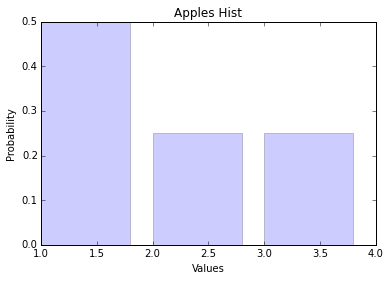

In [31]:
%pylab inline
# matplotlib
import  matplotlib.pyplot as plt  
vals = pmf_apples.keys()
freqs = pmf_apples.values()
print vals, freqs
plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Apples Hist')
plt.bar(vals,freqs, alpha = .2, color = 'b')
plt.show()

直方图很有用，可以很直观的给出下列特征：

* 众数：次数最多者，在本图中即为1
* 形状：到底是对称还是不对称，是偏峰还是如何？
* 异常值是如何？

### 正态分布的图像

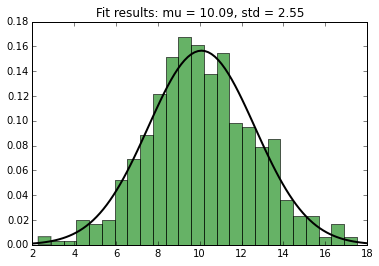

In [56]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)
# Fit a normal distribution to the data:
mu, std = norm.fit(data)
# Plot the histogram.
plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.show()

### 条件概率

事件A在另外一个事件B已经发生条件下的发生概率。

$$P(A|B)=\frac{P(AB)}{P(B)}$$

## 累积分布函数
现在我们有一个关于上大课和小班的统计表：

|人数|5~9|10~14|15~19|20~24|25~29|30~34|35~39|40~44|45~49|
|---|---|---|---|
|课程数|8|8|14|4|6|12|8|3|2|

现在如果要获得和上述一样的PMF，均值应该这么做呢？对于分组数据，使用中点值是可以考虑的。

In [77]:
x = number_p = [i for i in range(7,50,5)]
y = number_c = [8, 8, 14, 4, 6, 12, 8, 3, 2]
print number_p,"\n", number_c

[7, 12, 17, 22, 27, 32, 37, 42, 47] 
[8, 8, 14, 4, 6, 12, 8, 3, 2]
